# IMDB Movie Reviews Classification (Binary Classification)

In [1]:
# imports
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

In [2]:
import keras
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(f"training data: ${train_data.shape}")
print(f"training labels: ${train_labels.shape}")

print()

print(f"test data: ${test_data.shape}")
print(f"test labels: ${test_labels.shape}")

training data: $(25000,)
training labels: $(25000,)

test data: $(25000,)
test labels: $(25000,)


In [4]:
print(train_data[2])
print(len(train_data[2]))

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
141


In [5]:
train_labels[2]

0

In [6]:
print(max(max(s) for s in train_data))

9999


### Reverse reviews back to english

In [7]:
def decode_imdb_review(word_index_dict, item):
  #reverse word_index
  index_word_dict = dict([(value, index) for (index, value) in word_index_dict.items()])
  return ' '.join([index_word_dict.get(i-3, '?') for i in item]) #offset by 3, 0, 1, 2 reserved for "padding", "start of sequence", and "unknown"

In [8]:
review = decode_imdb_review(imdb.get_word_index(), train_data[1432])
print(review)

? it's a pretty good cast but the film has nowhere near the grace of the original italian comedy big deal on madonna street anyone looking for an entertaining caper film should visit the original william macy may be one of our greatest living actors but here he's put to little use and his role in the original was played by ? mastroianni so i sort of feel sorry for him trying to fill those shoes might as well try to imitate bogart or a young de niro the art direction is rich and ? but brings nothing to the story the extra bits they add to the story feel completely unnecessary and the things they take away are missed even starting the way they do seems ? gratuitous and takes away from the surprise of the original sam ? has his odd and ? charm and luis ? has that odd charisma but the love story part of the movie just seems clunky and flat it's too bad nobody has figured out how to make this movie as well as it was first made but then again it's too bad we live in a culture where we feel l

### Prepare the data

In [9]:
def vectorize(sequences, dim=10000):
  result = np.zeros((len(sequences), dim))
  for i, seq in enumerate(sequences):
    result[i, seq] = 1
  return result

In [10]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [11]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
#set validation data
x_val = x_train[:10000]
partial_x_trian = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.5183 - accuracy: 0.7834 - val_loss: 0.3983 - val_accuracy: 0.8627
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3122 - accuracy: 0.8998 - val_loss: 0.3132 - val_accuracy: 0.8810
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2278 - accuracy: 0.9273 - val_loss: 0.3203 - val_accuracy: 0.8676
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1795 - accuracy: 0.9435 - val_loss: 0.3192 - val_accuracy: 0.8710
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1485 - accuracy: 0.9523 - val_loss: 0.2834 - val_accuracy: 0.8894
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1231 - accuracy: 0.9618 - val_loss: 0.2920 - val_accuracy: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 98us/s

In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [28]:
import matplotlib.pyplot as plt

def plotloss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, len(loss) + 1)

  plt.plot(epochs_range, loss, 'bo', label='Training Loss')
  plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
  plt.title('Training ad=nd validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()


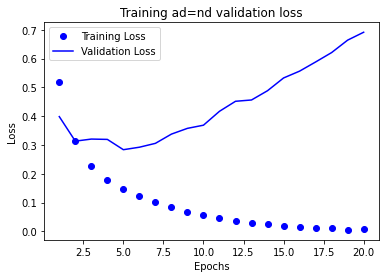

In [29]:
plotloss(history)

In [34]:
def plotaccuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs_range = range(1, len(acc) + 1)

  plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
  plt.plot(epochs_range, val_acc, 'b', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

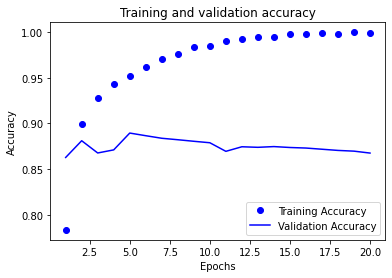

In [35]:
plotaccuracy(history)

From figures it clear, that our models is overfitting.

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 126us/step - loss: 0.4915 - accuracy: 0.7906 - val_loss: 0.3587 - val_accuracy: 0.8717
Epoch 2/4
15000/15000 [==============================] - 1s 94us/step - loss: 0.2834 - accuracy: 0.9040 - val_loss: 0.3268 - val_accuracy: 0.8670
Epoch 3/4
15000/15000 [==============================] - 1s 95us/step - loss: 0.2059 - accuracy: 0.9312 - val_loss: 0.2914 - val_accuracy: 0.8806
Epoch 4/4
15000/15000 [==============================] - 1s 95us/step - loss: 0.1627 - accuracy: 0.9461 - val_loss: 0.2782 - val_accuracy: 0.8855


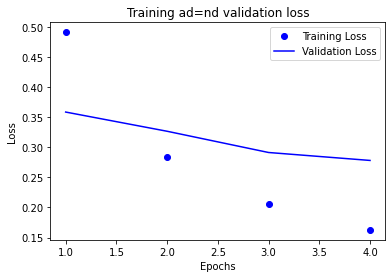

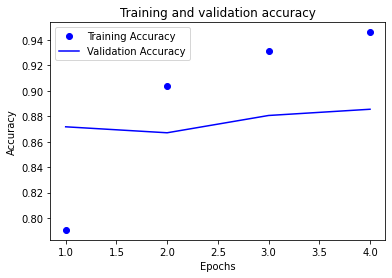

In [37]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    partial_x_trian,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

plotloss(history)
plotaccuracy(history)

In [43]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4673 - accuracy: 0.8180
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2678 - accuracy: 0.9073
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2016 - accuracy: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step


In [44]:
result

[0.29018137844085695, 0.8860399723052979]

In [45]:
model.predict(x_test)

array([[0.15407312],
       [0.99943733],
       [0.8815975 ],
       ...,
       [0.15250263],
       [0.06265625],
       [0.6062292 ]], dtype=float32)